In [ ]:
# Загрузим необходимые библиотеки

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

# убираем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузим данные из файла

data = pd.read_csv('Coding_dataset_03.csv')

data

,baths,sqft,PrivatePool,propertyType_Condo,propertyType_Condo/Townhome/Row Home/Co-Op,propertyType_High Rise,propertyType_Land,propertyType_Multi Family,propertyType_Other,propertyType_Single Family Home,...,PK–6_distance,PK–8_distance,K–6_distance,K–8_distance,K to 8_distance,other_distance,beds_sqft,stories_coding,target_log,State_coding
0,4,2900.0,0,0,0,0,0,0,0,1,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.03704,528.000,2,12.943237,1
1,3,1947.0,0,0,0,0,0,0,0,1,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00758,396.000,2,12.644328,3
2,2,3000.0,1,0,0,0,0,0,0,1,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00840,396.000,1,14.878496,4
3,8,6457.0,0,0,0,0,0,0,0,1,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00952,660.000,4,14.688894,1
4,3,1477.0,0,0,0,0,0,0,0,0,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00168,396.000,2,8.517193,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367038,6,4017.0,1,0,0,0,0,0,0,1,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00312,660.000,0,14.037854,2
367039,3,2000.0,0,1,0,0,0,0,0,0,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.25000,396.000,4,13.422466,2
367040,3,1152.0,0,0,0,0,0,0,0,1,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.02083,396.000,2,13.176852,4
367041,3,1990.0,0,0,0,0,0,0,1,0,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.07692,8.479,2,10.448715,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367043 entries, 0 to 367042
Data columns (total 81 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   baths                                       367043 non-null  int64  
 1   sqft                                        367043 non-null  float64
 2   PrivatePool                                 367043 non-null  int64  
 3   propertyType_Condo                          367043 non-null  int64  
 4   propertyType_Condo/Townhome/Row Home/Co-Op  367043 non-null  int64  
 5   propertyType_High Rise                      367043 non-null  int64  
 6   propertyType_Land                           367043 non-null  int64  
 7   propertyType_Multi Family                   367043 non-null  int64  
 8   propertyType_Other                          367043 non-null  int64  
 9   propertyType_Single Family Home             367043 non-null  int64  
 

In [ ]:
# Выделим признаки и целевой признак

X = data.drop('target_log', axis=1)

y = data['target_log']

<Axes: >

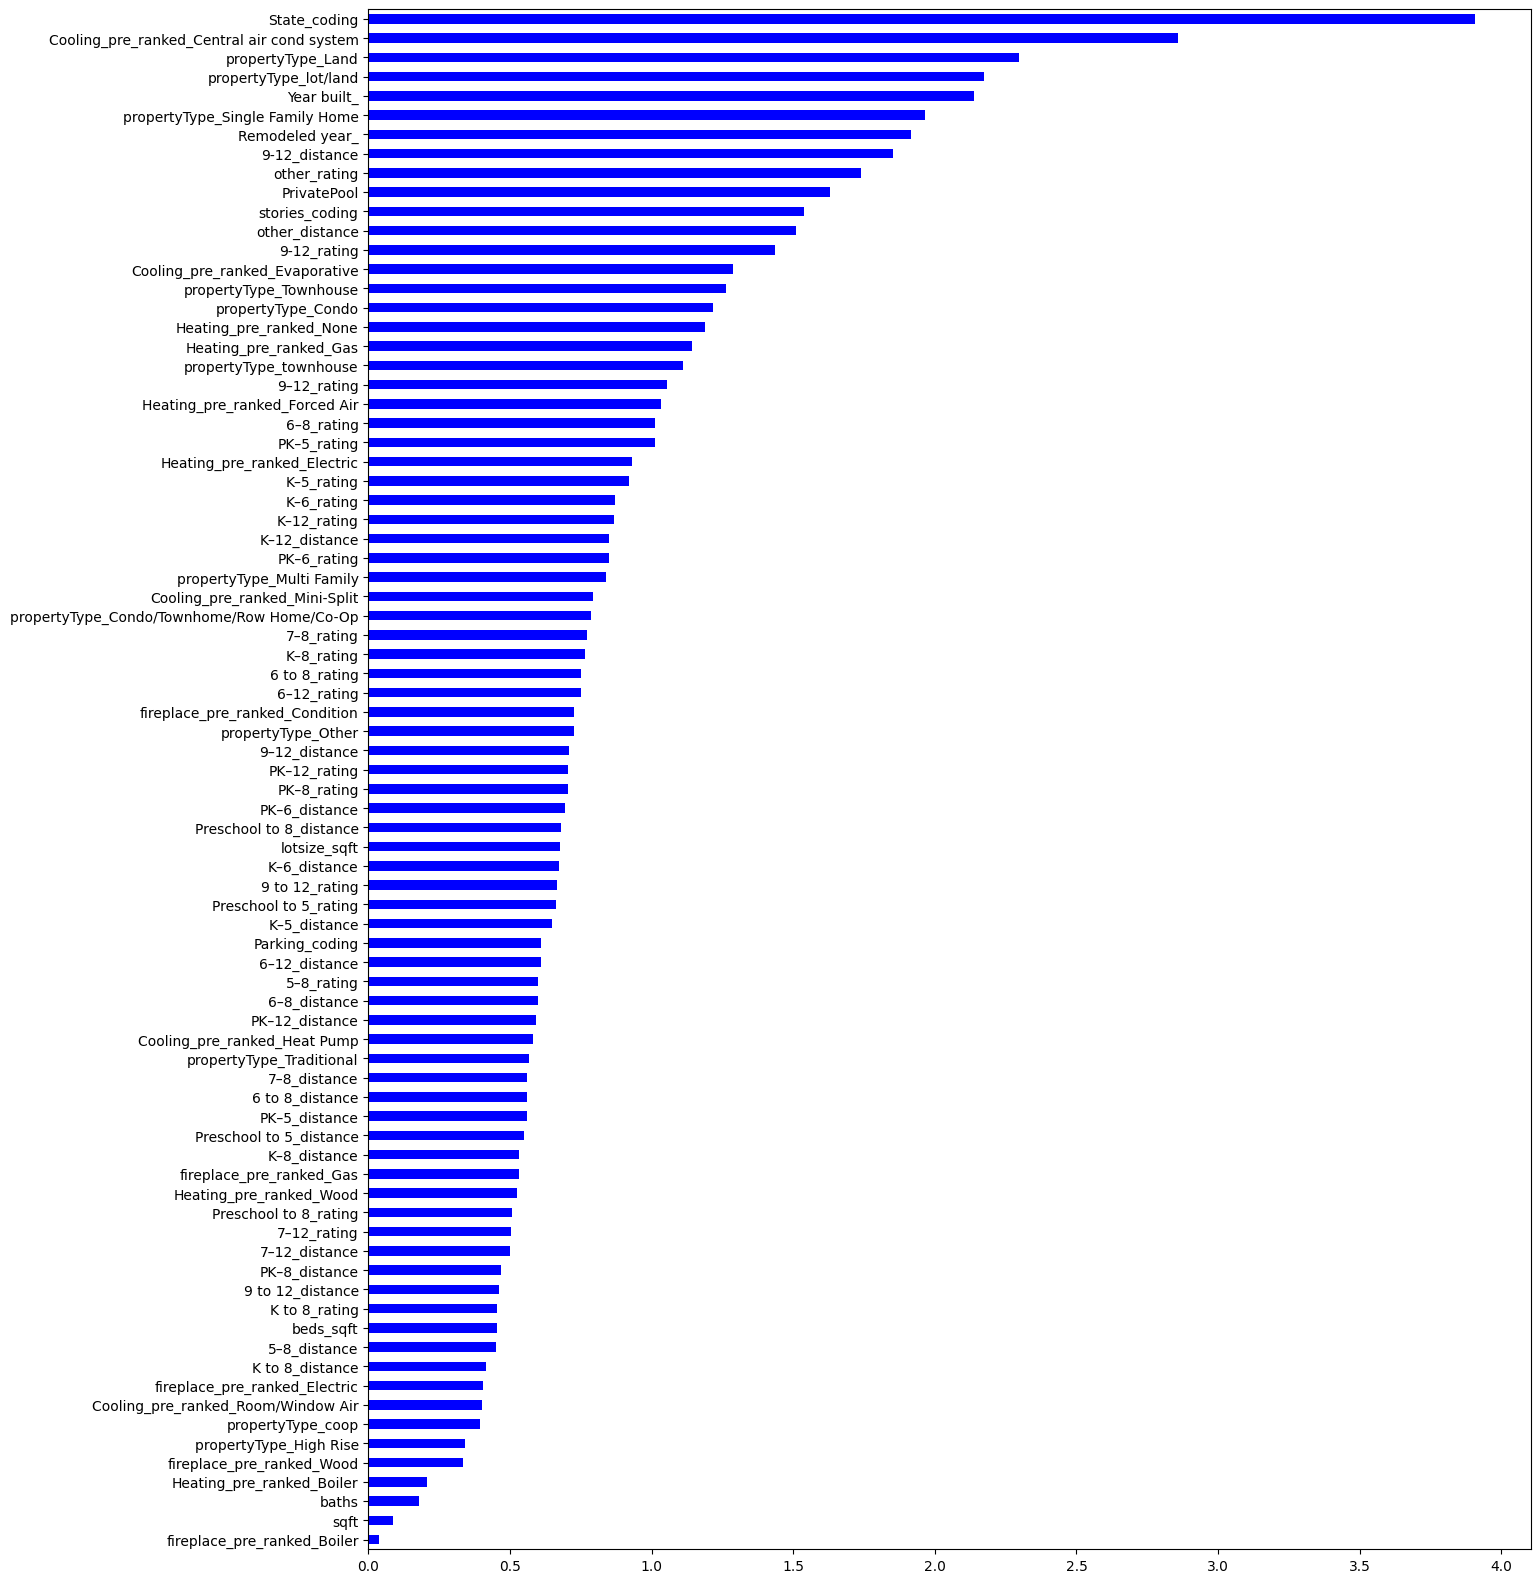

In [ ]:
# проведем анализ значимости признаков

# визуализируем результат анализа значимости:
imp_num = pd.Series(f_classif(X[X.columns], y)[0], index = X.columns)
imp_num.sort_values(inplace = True)

fig5, ax5 = plt.subplots(figsize=(15, 20))
imp_num.plot(kind = 'barh', color='blue')

По значимости на первом месте у нас получился признак State_coding - в какой группе штатов находится объект недвежимости (т.е. географическое расположение). Далее признак, указывающий на наличие/отсутствие  охлаждающей системы центральной возушной системы кондиционирования - Cooling_pre_ranked_Central air cond system. 

Также важен вид собственности объекта - является ли объект земельным участком, год постройки и последнего ремонта. Является ли объект неджвижимости - семейным домом или нет. 

И т.д.

Проведем **тесты на нормальность распределения данных целевого признака target_log**: Shapiro-Wilk test, Kolmogorov-Smirnov test, Q-Q plot.

Shapiro-Wilk test: 0.9506994334196744 1.1614835135396595e-117
Kolmogorov-Smirnov test: 0.9999400447090477 0.0


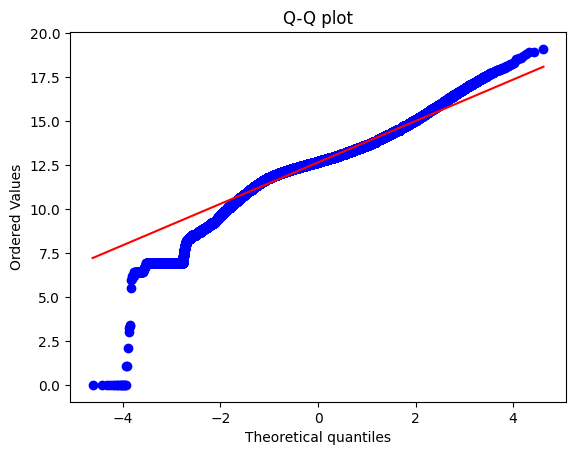

In [ ]:
# Проведем тесты на нормальность целевого признака target_log

# Shapiro-Wilk test
w_stat, p_value = stats.shapiro(y)
print("Shapiro-Wilk test:", w_stat, p_value)

# Kolmogorov-Smirnov test
ks_stat, p_value = stats.kstest(y, 'norm')
print("Kolmogorov-Smirnov test:", ks_stat, p_value)

# assume y is a pandas Series
stats.probplot(y, dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.show()

Результаты Shapiro-Wilk test и Kolmogorov-Smirnov test довольно близки к 1, что говорит о близости распределения данных к нормальному закону. Вторые цифры в обоих тестах являются вероятностями того, что данные не являютя нормально-распределенными - вероятность практически нулевая - сильно меньше значения 0.05.

Q-Q plot (Quantile-Quantile plot) - это график, который используется для проверки нормальности распределения данных. Он представляет собой график, на котором откладываются квантили данных против квантилей нормального распределения. Если данные нормально распределены, то точки на графике должны лежать близко к прямой линии. Если данные не нормально распределены, то точки на графике будут отклоняться от прямой линии.

В нашем случае точки на графике лежат близко к прямой линии, что также указывает на закон нормального распределения данных признака.

Проведем **тесты о влиянии признака Cooling_pre_ranked_Central air cond system** на целевой признак.

In [12]:
# two-sample t-test
t_stat, p_value = stats.ttest_ind(y[X['Cooling_pre_ranked_Central air cond system'] == 0], 
                                 y[X['Cooling_pre_ranked_Central air cond system'] == 1])
print("Two-sample t-test:", t_stat, p_value)

# Wilcoxon rank-sum test
u_stat, p_value = stats.mannwhitneyu(y[X['Cooling_pre_ranked_Central air cond system'] == 0], 
                                    y[X['Cooling_pre_ranked_Central air cond system'] == 1])
print("Wilcoxon rank-sum test:", u_stat, p_value)

# Chi-squared test
contingency_table = pd.crosstab(X['Cooling_pre_ranked_Central air cond system'], y)
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared test:", chi2_stat, p_value, dof, expected)

Two-sample t-test: -106.45166506383626 0.0
Wilcoxon rank-sum test: 14463601087.5 0.0
Chi-squared test: 82117.07771873294 0.0 33613 [[6.63192051 0.88425607 0.44212803 ... 0.44212803 0.88425607 0.44212803]
 [8.36807949 1.11574393 0.55787197 ... 0.55787197 1.11574393 0.55787197]]


**Two-sample t-test**: -106.45166506383626 0.0

Этот тест используется для сравнения средних значений двух групп.
Первое значение (-106.45166506383626) - это статистика t, которая представляет собой меру разницы между средними значениями двух групп.
Второе значение (0.0) - это p-значение, которое представляет собой вероятность того, что разница между средними значениями двух групп является случайной.
Поскольку p-значение равно 0.0, это означает, что разница между средними значениями двух групп является статистически значимой.

**Wilcoxon rank-sum test**: 14463601087.5 0.0

Этот тест используется для сравнения распределений двух групп.
Первое значение (14463601087.5) - это статистика U, которая представляет собой меру разницы между распределениями двух групп.
Второе значение (0.0) - это p-значение, которое представляет собой вероятность того, что разница между распределениями двух групп является случайной.
Поскольку p-значение равно 0.0, это означает, что разница между распределениями двух групп является статистически значимой.

**Chi-squared test: 82117.07771873294 0.0 33613 [[6.63192051 0.88425607 0.44212803 ... 0.44212803 0.88425607 0.44212803] [8.36807949 1.11574393 0.55787197 ... 0.55787197 1.11574393 0.55787197]]**

Этот тест используется для проверки независимости двух переменных.
Первое значение (82117.07771873294) - это статистика χ², которая представляет собой меру зависимости между двумя переменными.
Второе значение (0.0) - это p-значение, которое представляет собой вероятность того, что зависимость между двумя переменными является случайной.
Поскольку p-значение равно 0.0, это означает, что зависимость между двумя переменными является статистически значимой.
Третий элемент (33613) - это количество степеней свободы, которое представляет собой количество независимых наблюдений.
Четвертый элемент (матрица) - это матрица ожидаемых частот, которая представляет собой ожидаемые частоты каждой категории при условии независимости двух переменных.

**Вывод:** В целом, результаты всех трех тестов показывают, что между двумя группами существует статистически значимая разница.

In [ ]:
# Уникальные значения признака State_coding

X['State_coding'].unique()

array([1, 3, 4, 2], dtype=int64)

Проведем ANOVA test на значимость влияния признака State_coding (признак принимает 4 значения).

In [ ]:
# ANOVA test

f_stat, p_value = stats.f_oneway(y[X['State_coding'] == 1], 
                                 y[X['State_coding'] == 2], 
                                 y[X['State_coding'] == 3], 
                                 y[X['State_coding'] == 4])
print("ANOVA test:", f_stat, p_value)

ANOVA test: 14772.199981442642 0.0


**ANOVA test: 14772.199981442642 0.0** означает, что результаты теста ANOVA (анализ дисперсии) показали следующее:

F-статистика (14772.199981442642): Это значение показывает, насколько различия между средними значениями y для разных уровней признака 'State_coding' значительны. Чем больше это значение, тем больше различия между средними значениями.
P-значение (0.0): Это значение показывает вероятность того, что наблюдаемые различия между средними значениями y для разных уровней признака 'State_coding' являются случайными. Поскольку p-значение равно 0.0, это означает, что вероятность случайных различий равна 0, и мы можем с уверенностью сказать, что различия между средними значениями y для разных уровней признака 'State_coding' являются статистически значимыми.
В общем, результаты теста ANOVA показывают, что признак 'State_coding' имеет значимое влияние на переменную y, и что средние значения y для разных уровней признака 'State_coding' различны.

В частности, поскольку p-значение равно 0.0, это означает, что мы можем отклонить нулевую гипотезу о том, что средние значения y для разных уровней признака 'State_coding' равны. Это означает, что признак 'State_coding' является значимым предиктором переменной y.

In [ ]:
# Kruskal-Wallis H-test

h_stat, p_value = stats.kruskal(y[X['State_coding'] == 1], 
                                y[X['State_coding'] == 2], 
                                y[X['State_coding'] == 3], 
                                y[X['State_coding'] == 4])
print("Kruskal-Wallis H-test:", h_stat, p_value)

Kruskal-Wallis H-test: 49591.19300964052 0.0


**Kruskal-Wallis H-test: 49591.19300964052 0.0** означает, что результаты теста Kruskal-Wallis (непараметрический тест для сравнения нескольких групп) показали следующее:

H-статистика (49591.19300964052): Это значение показывает, насколько различия между распределениями y для разных уровней признака 'State_coding' значительны. Чем больше это значение, тем больше различия между распределениями.
P-значение (0.0): Это значение показывает вероятность того, что наблюдаемые различия между распределениями y для разных уровней признака 'State_coding' являются случайными. Поскольку p-значение равно 0.0, это означает, что вероятность случайных различий равна 0, и мы можем с уверенностью сказать, что различия между распределениями y для разных уровней признака 'State_coding' являются статистически значимыми.

В общем, результаты теста Kruskal-Wallis показывают, что признак 'State_coding' имеет значимое влияние на переменную y, и что распределения y для разных уровней признака 'State_coding' различны.

В частности, поскольку p-значение равно 0.0, это означает, что мы можем отклонить нулевую гипотезу о том, что распределения y для разных уровней признака 'State_coding' равны. Это означает, что признак 'State_coding' является значимым предиктором переменной y.

Обратите внимание, что тест Kruskal-Wallis является непараметрическим, то есть он не требует нормальности данных, в отличие от теста ANOVA. Поэтому результаты теста Kruskal-Wallis могут быть более robustными, чем результаты теста ANOVA, если данные не удовлетворяют предположениям нормальности.

Проведем **тест влияния колличественного признака Year built** на цлевую переменную.

In [ ]:
corr_coef, p_value = stats.pearsonr(X['Year built_'], y)
print("Корреляция между 'Year built' и y:", corr_coef)
print("p-значение:", p_value)

Корреляция между 'Year built' и y: -0.001994458050520346
p-значение: 0.22692380460406647


**Корреляция между 'Year built' и y: -0.001994458050520346**

Корреляционный коэффициент (-0.001994458050520346) показывает, что между 'Year built' и y существует очень слабая отрицательная корреляция. Это означает, что по мере увеличения 'Year built' y уменьшается, но эта связь очень слабая.
p-значение: 0.22692380460406647

p-значение (0.22692380460406647) показывает, что корреляция между 'Year built' и y не является статистически значимой. Это означает, что мы не можем с уверенностью сказать, что корреляция между 'Year built' и y не является случайной.
В целом, результаты показывают, что между 'Year built' и y существует очень слабая отрицательная корреляция, но эта связь не является статистически значимой. Это может означать, что 'Year built' не является значимым предиктором y.

Если бы p-значение было меньше 0.05, мы бы могли сказать, что корреляция между 'Year built' и y статистически значима, и что 'Year built' является значимым предиктором y. Но в данном случае p-значение больше 0.05, поэтому мы не можем сделать такой вывод.